# Part II - (Presentation Title)
## by Olawoye Taofeek Opeyemi

## Investigation Overview


> In this project, we want to demonstrate the importance and value of data visualization techniques in the data analysis process. First, I will be performing Data Cleaning and wrangling then exploration and visualization using frequently used libraries, such as NumPy, pandas, Matplotlib, and Seaborn. Then, in the second part we will produce a short presentation that illustrated interesting discovery from our dataset.



## Dataset Overview

> The data consists of information regarding over 183,000 rides made in a bike-sharing system covering the greater San Francisco Bay area. The data features include duration (secs) and others such as DateTime, customer type, gender, and some additional variables.
Out of 16 specifications 9 are numerical, 2 are datetime, 4 are object type and 1 is boolean type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

Data wrangling and Cleaning

In [2]:
# load in the dataset into a pandas dataframe
df_ride = pd.read_csv('201902-fordgobike-tripdata.csv')

# making a copy of the actual dataset 
df = df_ride.copy()

# Dropping null values as part of cleaning process
df.dropna(inplace=True)

dates = ['start_time', 'end_time']
for date in dates:
    df[date] = pd.to_datetime(df[date])
    
# Extracting the hours, week day name and month, for both start_time and end_time to help answer the most important questions of our analysis.
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
df['start_hour'] = df['start_time'].dt.hour

df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hour'] = df['end_time'].dt.hour

days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Use pandas.astype() to convert the "start_day" column from a plain object type into an ordered categorical type 
StartdayClasses = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['start_day'] = df['start_day'].astype(StartdayClasses)

# Use pandas.astype() to convert the "end_day" column from a plain object type into an ordered categorical type
df['end_day'] = df['end_day'].astype(StartdayClasses)

# Creating a column for  actual Age naming it 'Age': which is gotten by subtracting the years from 2019.
df['Age'] = 2019 - df['member_birth_year']

# Converting the age column into int dtype
df['Age'] = df['Age'].astype(int)

# Since the 'start_month' and  'end_month' is the same all through their column I will be dropping them 
df.drop(columns=['end_month', 'start_month'], inplace=True)

df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Thursday,17,Friday,8,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Thursday,12,Friday,5,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Thursday,17,Friday,4,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Thursday,23,Friday,0,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,Thursday,23,Friday,0,60


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

Most rides were taken on Thursdays and Tuesdays. Weekends have the lowest ride records which actually makes sense as weekends are regarded as work off days. On average(mean) weekends recorded the highest duration seconds while their is really no big difference on average time duration for trip with respect to the weekdays.

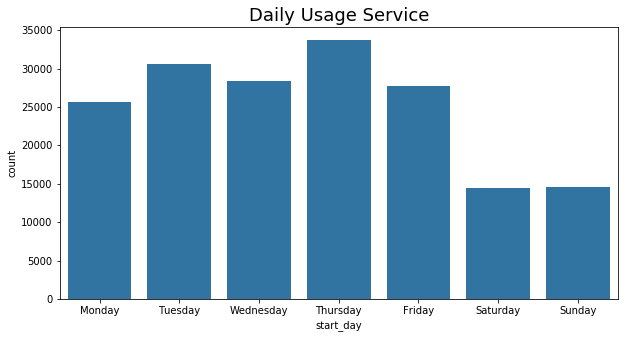

In [3]:
# Using a single color
base_color = sns.color_palette()[0]

# This is a catgorical data, so Bar chart will be a suitable chart
# Plotting a Bar chart, using bar chart from sns.countplot()

plt.figure(figsize=(10,5))
plt.title('Daily Usage Service', fontsize=18)
sns.countplot(data=df, x='start_day', color=base_color);

In [4]:
# Grouping by 'start_day' to find the days with the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean()

start_day
Monday       696.970906
Tuesday      652.839459
Wednesday    665.127946
Thursday     678.289748
Friday       681.274699
Saturday     849.771750
Sunday       858.673649
Name: duration_sec, dtype: float64

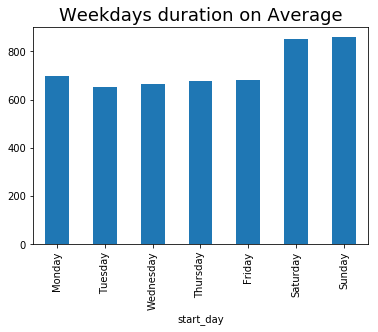

In [5]:
# Create a bar chart to see which of the weekdays recorded the highest duration seconds on average.
df.groupby('start_day')['duration_sec'].mean().plot(kind='bar', color=base_color)
plt.title('Weekdays duration on Average', size=18);

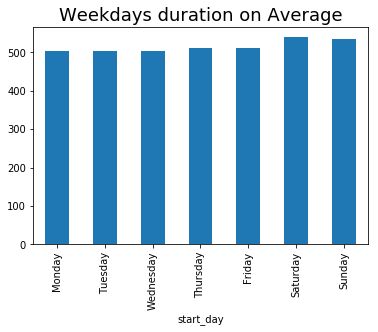

In [6]:
# A plot of Average ride based on a days
df.groupby('start_day')['duration_sec'].median().plot(kind='bar', color=base_color)
plt.title('Weekdays duration on Average', size=18);

## (Visualization 2)

There is a long tail in the distribution in the duration_sec implying high skewness so lets put it on log scale. Before log transformation, the data is roughly unimodal, with a large peak somewhere between 0 and 1000 secs. Trip duration is mostly concentrated on the lower end of the duration seconds. Most of the values are less than 2000 seconds with peak around 600-800 seconds. Trip duration values first increases starting from around 1000 values at 0 to 12000 values at around 600 but then starts to fall and moving below 2000 values under 2000 sec.

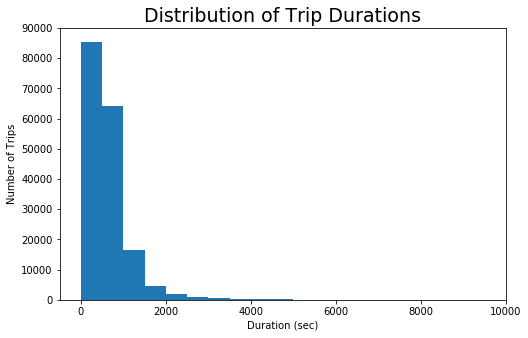

In [7]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

# Since duration_sec is an integer we use histogram to show its distribution
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations', size=19)
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.axis([-500, 10000, 0, 90000])
plt.show()

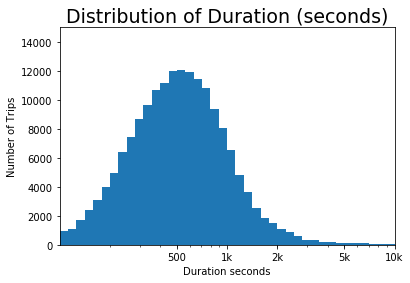

In [8]:
# Applying log transformation on the dataset to see a better view of our plot
log_binsize = 0.05
log_bins = 10 ** np.arange(2.0, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)
plt.hist(data = df, x = 'duration_sec', bins = log_bins)
plt.xlabel('Duration seconds')
plt.xscale('log')
plt.ylabel('Number of Trips')
plt.title('Distribution of Duration (seconds)', size=19)
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## (Visualization 3)

There is a long tail in the Age distribution implying high skewness so lets put it on log scale. Before log transformation, the data is roughly unimodal, with a large peak somewhere between 20 and 40 years. Applying log transform on the age column then make a hist plot to see how the transformation changes. Applying log transformation reduces the skewness. We can see that the distribution is more concentrated between 20 to 40 years old. This implies those in younger age group take more time riding bikes than those older.

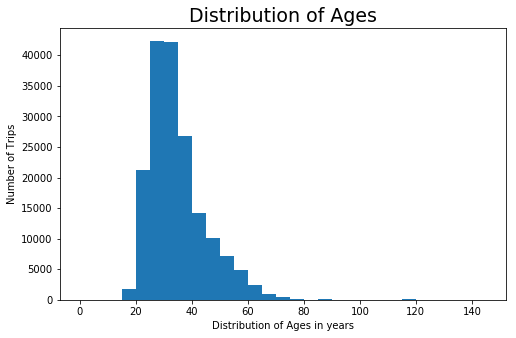

In [9]:
# Making Age plot distribution using Histogram
# start with a standard-scaled plot
binsize = 5
bins = np.arange(0, df['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Age', bins = bins)
plt.title('Distribution of Ages', size=19)
plt.xlabel('Distribution of Ages in years')
plt.ylabel('Number of Trips')
plt.show()

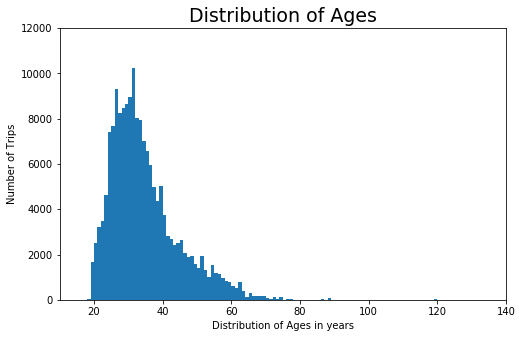

In [10]:
# Making Age plot distribution using Histogram
binsize = 1
bins = np.arange(0, df['Age'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'Age', bins = bins)
plt.axis([10, 140, 0, 12000])
plt.title('Distribution of Ages', size=19)
plt.xlabel('Distribution of Ages in years')
plt.ylabel('Number of Trips')
plt.show()

## (Visualization 4)

The time range with the highest rides is within 8-9th hour which depict early morning and 17-18th hour depicting later in the day(evening). The higher ride frequencies for morning (8th and 9th hours) and evening (17th and 18th hours) can be automatically linked to rush hours where people leave for work and come back later in the evening.

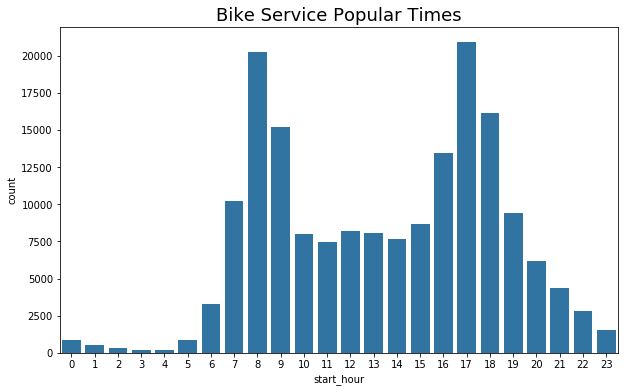

In [11]:
# Ordeing the hours from 0-24
hour_order = np.arange(0,24)

# Plotting the hours to get which record the highest rides
plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=18)
ax = sns.countplot(data=df, x='start_hour', order=hour_order, color=base_color);

## (Visualization 5)

From the plot above we can see that higher percentage of customers are taking longer trips when compared to subscribers. Indicating Customer trips take a longer duration on average than subscriber user type.

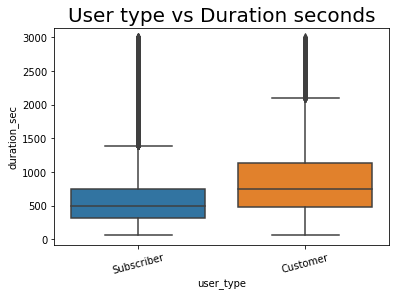

In [12]:
# Bivariate plot
# Making a statistical plot(Box plot) to show variations of user_type with respect to duration_sec
# Taking care of the outliers

sns.boxplot(data = df[df['duration_sec'] < 3000], x = 'user_type', y = 'duration_sec')
plt.xticks(rotation = 15)
plt.title('User type vs Duration seconds', size=20);

## (Visualization 6)

The real life scenerio should always be that those younger should take more rides. The plot above depicts exactly that showing that those within 17-45 years of age took more rides than those above 50 years.
Looking at plot it can be deduce that most frequent users of bikes are aged between 17 and 45. Indicating younger members clocked Higher duration in seconds .

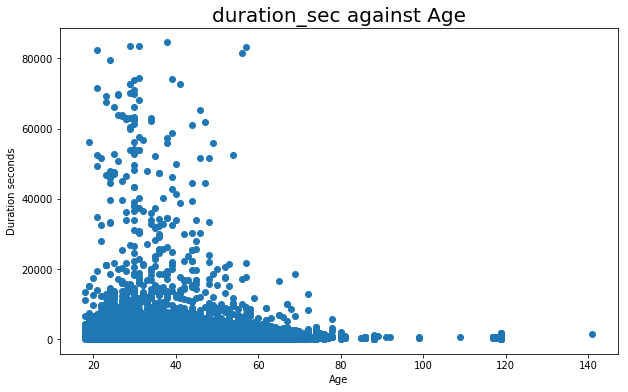

In [13]:
# Bivariate Plot
# A plot between duration_sec and Age. Since both are continous variables, a scatter plot will be the best choice 

plt.figure(figsize=(10,6))
plt.title('duration_sec against Age', fontsize=20)
plt.scatter(data=df, x='Age', y='duration_sec')
plt.xlabel('Age')
plt.ylabel('Duration seconds');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 454532 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/